<a href="https://colab.research.google.com/github/sabaakram539/Regression_using_keras/blob/main/Regression_using.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data=pd.read_csv("Admission_Predict.csv")
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [14]:
data.shape

(400, 9)

In [15]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [16]:
data.duplicated().sum()

0

In [17]:
data.drop("Serial No.",1,inplace=True)

In [18]:
data.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [26]:
x=data.iloc[:,0:-1].values
y=data.iloc[:,-1].values

In [27]:
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [28]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [29]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [30]:
x=scalar.fit_transform(x)

In [32]:
x[0]

array([1.76210664, 1.74697064, 0.79882862, 1.09386422, 1.16732114,
       1.76481828, 0.90911166])

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [34]:
x_train.shape

(360, 7)

In [35]:
x_test.shape

(40, 7)

In [36]:
y_train.shape

(360,)

In [37]:
y_test.shape

(40,)

In [38]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [43]:
model=Sequential()

In [44]:
model.add(Dense(3,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(1,activation='linear'))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 24        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [48]:
model.fit(x_train,y_train,epochs=10,batch_size=10,verbose=1)

Epoch 1/10
36/36 [==============================] - 1s 2ms/step - loss: 0.7109
Epoch 2/10
36/36 [==============================] - 0s 2ms/step - loss: 0.5409
Epoch 3/10
36/36 [==============================] - 0s 1ms/step - loss: 0.4135
Epoch 4/10
36/36 [==============================] - 0s 1ms/step - loss: 0.3195
Epoch 5/10
36/36 [==============================] - 0s 2ms/step - loss: 0.2562
Epoch 6/10
36/36 [==============================] - 0s 2ms/step - loss: 0.2148
Epoch 7/10
36/36 [==============================] - 0s 1ms/step - loss: 0.1862
Epoch 8/10
36/36 [==============================] - 0s 2ms/step - loss: 0.1638
Epoch 9/10
36/36 [==============================] - 0s 1ms/step - loss: 0.1456
Epoch 10/10
36/36 [==============================] - 0s 1ms/step - loss: 0.1296


In [49]:
y_pred=model.predict(x_test)

In [50]:
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test,y_pred)

-5.3790290060167685

**Our model is performing very poor. Lets try to improve this by various means**
**We can improve our model performance by various means. In this project we will try three methods**
1. **Increasing the number of epochs**
2. **Increase the number of nodes in the hidden layer**
3. **Adding more layers**

**1. Increasing the number of epochs from 10 to 100**

In [52]:
model=Sequential()

In [53]:
model.add(Dense(3,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(1,activation='linear'))

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3)                 24        
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [56]:
model.fit(x_train,y_train,epochs=100,batch_size=10,verbose=1)

Epoch 1/100
36/36 [==============================] - 0s 1ms/step - loss: 0.4636
Epoch 2/100
36/36 [==============================] - 0s 1ms/step - loss: 0.3730
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3189
Epoch 4/100
36/36 [==============================] - 0s 1ms/step - loss: 0.2784
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.2455
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.2176
Epoch 7/100
36/36 [==============================] - 0s 1ms/step - loss: 0.1935
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1720
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1534
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1367
Epoch 11/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1223
Epoch 12/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1092
Epoch 13/100
36/36 [=================

In [57]:
y_pred=model.predict(x_test)

In [58]:
r2_score(y_test,y_pred)

0.6613139944171326

**2. Increasing the number of nodel of the hidden layer from 3 to 7**

In [73]:
model=Sequential()

In [80]:
model.add(Dense(4,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(1,activation='linear'))

In [81]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 5)                 40        
                                                                 
 dense_12 (Dense)            (None, 1)                 6         
                                                                 
 dense_13 (Dense)            (None, 4)                 8         
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [83]:
model.fit(x_train,y_train,epochs=100,batch_size=10,verbose=1)

Epoch 1/100
36/36 [==============================] - 1s 2ms/step - loss: 0.5809
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4857
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3510
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.2215
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1771
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1002
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0479
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0251
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 11/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 12/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 13/100
36/36 [=================

In [84]:
y_pred=model.predict(x_test)

In [85]:
r2_score(y_test,y_pred)

0.707811261465082

**3. Adding one more hidden layer**

In [130]:
model=Sequential()

In [131]:
model.add(Dense(4,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='linear'))

In [132]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 4)                 32        
                                                                 
 dense_31 (Dense)            (None, 5)                 25        
                                                                 
 dense_32 (Dense)            (None, 1)                 6         
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [134]:
model.fit(x_train,y_train,epochs=100,batch_size=10,verbose=1)

Epoch 1/100
36/36 [==============================] - 0s 2ms/step - loss: 0.2043
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1564
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1280
Epoch 4/100
36/36 [==============================] - 0s 1ms/step - loss: 0.1079
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0911
Epoch 6/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0773
Epoch 7/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0658
Epoch 8/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0562
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0482
Epoch 10/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0405
Epoch 11/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0336
Epoch 12/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0284
Epoch 13/100
36/36 [=================

In [135]:
y_pred=model.predict(x_test)

In [136]:
r2_score(y_test,y_pred)

0.6897050546669372

**Introducing Validation Set**

In [137]:
history=model.fit(x_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
29/29 [==============================] - 0s 8ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0046
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 8/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 9/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 10/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 11/

In [138]:
y_pred=model.predict(x_test)

In [139]:
r2_score(y_test,y_pred)

0.7212903804100822

In [140]:
history.history

{'loss': [0.004477759823203087,
  0.0045675477012991905,
  0.0044569894671440125,
  0.004424211569130421,
  0.004395225550979376,
  0.004399880301207304,
  0.004496186971664429,
  0.004432806745171547,
  0.004429655149579048,
  0.0043178447522223,
  0.004342511296272278,
  0.004336358979344368,
  0.0043524643406271935,
  0.004317500162869692,
  0.004321620799601078,
  0.004334063734859228,
  0.004327366128563881,
  0.00433444045484066,
  0.004286416806280613,
  0.004353142809122801,
  0.004338149446994066,
  0.004173235967755318,
  0.004217080306261778,
  0.00437028706073761,
  0.004270150326192379,
  0.00430575804784894,
  0.004183704033493996,
  0.004226915072649717,
  0.004174389876425266,
  0.0042663561180233955,
  0.004144796635955572,
  0.004194767214357853,
  0.004166311118751764,
  0.004250221885740757,
  0.004292298574000597,
  0.0041997116059064865,
  0.004540283232927322,
  0.00420474074780941,
  0.004145569168031216,
  0.004097155295312405,
  0.004146165680140257,
  0.00411

In [141]:
df=pd.DataFrame(history.history)

In [142]:
df.head()

,loss,val_loss
0,0.004478,0.004306
1,0.004568,0.004346
2,0.004457,0.004496
3,0.004424,0.004278
4,0.004395,0.004369


In [144]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Number of epochs')

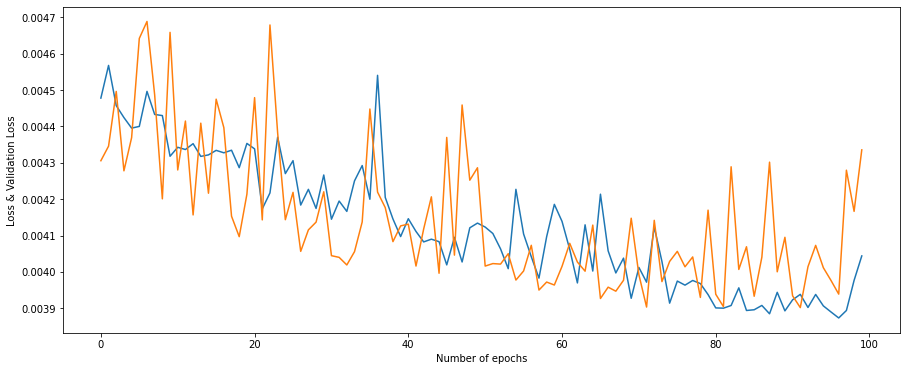

In [149]:
plt.figure(figsize=(15,6))
plt.plot(df.loss)
plt.plot(df.val_loss)
plt.ylabel("Loss & Validation Loss")
plt.xlabel("Number of epochs")